# 3. Working with data

## 3.0 Preamble

At the top of almost every piece of scientific computing work, we'll import these standard modules.

In [164]:
# Import modules, and give them short aliases so we can write e.g. np.foo rather than numpy.foo
import math, random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize
import pandas
from collections import OrderedDict, namedtuple
# The next line is a piece of magic, to let plots appear in our Jupyter notebooks
%matplotlib inline 

# 3.1 What data looks like

Scientific computing is all about the data. You will almost always work with data in the form of a spreadsheet-like table, often referred to as a _data frame_. 
Here is a example: a sample of rows from a classic dataset (the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), introduced by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936; Fisher was described as a "genius who almost single-handedly created the foundations for modern statistical science").

| Sepal.Length | Sepal.Width | Petal.Length | Petal.Width | Species |
|----------------------------------------------------------------|
| 7.7          |        3.8  |         6.7  |        2.2  |  virginica
| 5.3          |        3.7  |         1.5  |        0.2  |     setosa
| 5.8          |        2.7  |         5.1  |        1.9  |  virginica
| 5.5          |        2.4  |         3.7  |        1.0  | versicolor
| 6.7          |        3.0  |         5.2  |        2.3  |  virginica

A data frame is a collection of named columns. Each column has the same length, and all entries in a column have the same type, though different columns may have different types. It is basically the same as a table in a relational database (except that you should think of scientific data tables as logs of observations, which means that the UPDATE and DELETE database operations are irrelevant, and issues about database consistency are irrelevant).

In Python, we have some options about how to store data frames. A simple choice, which we'll use in this notebook, is to store them as dictionaries of `numpy` vectors, e.g.

In [ ]:
iris = {'Sepal.Length': np.array([7.7, 5.3, 5.8, 5.5, 6.7]),
        'Sepal.Width': np.array([3.8, 3.7, 2.7, 2.4, 3.0]),
        'Petal.Length': np.array([6.7, 1.5, 5.1, 3.7, 5.2]),
        'Petal.Width': np.array([2.2, 0.2, 1.9, 1.0, 2.3]),
        'Species': np.array(['virginica', 'setosa', 'virginica', 'versicolor', 'verginica'])}

For example, to extract the rows with `virginica` records,

In [ ]:
i = iris['Species'] == 'virginica'
iris_virginica = {k:v[i] for k,v in iris.items()}

### Special classes for data frames

* Why not store it as a `numpy` matrix? Because all elements in a `numpy` matrix have to be the same type.
* What's bad about storing data frames as a dictionary of vectors? Because we might accidentally set some columns to have different lengths. Also, because we have to write bothersome code for simple tasks like picking out rows.
* Does it have to be `numpy` vectors rather than plain Python lists? Numpy is great for speed, as we learnt in Section 2, but for small datasets or for custom column types it's fine to use lists.
Also, `numpy` doesn't have a standard type for categorical data (like `Species` in the example above), which is a bother. (It might have helped us catch the spelling mistake in the last row.)
* Why not use object-oriented design and invent a class for data frames? That's exactly what [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) is. `Pandas` is currently the best library for working with data in Python, widely used inside companies like Google. However, it has idiosyncratic syntax which takes some time to learn. Also, I think it's not yet mature, and by the time you graduate there will probably be something better. If you want to learn data science right now you should learn to use `pandas`.
* Are there any other standard classes for data frames? `Numpy` has a [structured array](https://docs.scipy.org/doc/numpy/user/basics.rec.html#module-numpy.doc.structured_arrays) type. It's not as well designed as a `pandas.DataFrame`.

## 3.1 Importing data

When your data is a very simple comma-separated value (CSV) file then it's very easy to import. A CSV file looks like this:
```
"Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species"
5.1,3.5,1.4,0.2,"setosa"
4.9,3,1.4,0.2,"setosa"
4.7,3.2,1.3,0.2,"setosa"
4.6,3.1,1.5,0.2,"setosa"
5,3.6,1.4,0.2,"setosa"
```
i.e. a header line, then one line per row of the data frame, values separated by commas.
Here is code to import a simple CSV file:

In [3]:
df = pandas.read_csv('data/iris.csv')         # this returns a pandas.DataFrame
df = {col:df[col].values for col in df}       # (optional) convert it to dict of vectors

If your file is nearly a CSV but has some quirks such as comments or a missing header row, experiment with the options in [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) or [`pandas.read_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html). For extreme quirks you may need to use the raw Python [`csv.reader`](https://docs.python.org/3/library/csv.html#csv.reader).

To write a CSV file, it's easiest to use `pandas.DataFrame.to_csv()`. 
If we're starting with a dictionary of vectors, we have to create a `pandas.DataFrame` first. Pandas likes to add a column with row numbers, which `index=False` suppresses.

In [7]:
pandas.DataFrame(df).to_csv('data/temp.csv', index=False)

In my experience, around 75% of the time you spend working with data will be fighting to import it and clean it up. For the most part this is just general-purpose programming, but there are a few library routines that will save you from reinventing the wheel. See
[&sect;A. Data import and cleanup](A.%20Data%20import%20and%20cleanup.ipynb) for a collection of recipes for

* [reading from a URL](A.%20Data%20import%20and%20cleanup.ipynb#readurl)
* [parsing a log file using regular expressions](A.%20Data%20import%20and%20cleanup.ipynb#regexp)
* [reading JSON from a web service](A.%20Data%20import%20and%20cleanup.ipynb#json)
* [scraping a website with XPath](A.%20Data%20import%20and%20cleanup.ipynb#xpath)
* [reading from an SQL database](A.%20Data%20import%20and%20cleanup.ipynb#sql)

## 3.2 Simple data handling

* summary(data.frame)
* * numeric: quantiles, histogram
* * factor: tabulation, bar chart
* cross tabulation, aggregation, facets
* joining: per-station summaries
* pivotting

In [174]:
df = pandas.read_csv('data/flood.csv')
df = OrderedDict((k,df[k].values) for k in df)

View some rows

In [175]:
pandas.DataFrame(df)[1:4]

,label,id,lat,lng,town,river,measure_id,qualifier,parameter,period,low,high,valuetype,t,value
1,Cambridge Jesus Lock,E60501,52.212835,0.120872,Cambridge,River Cam,1702,Stage,Water Level,900.0,0.637,0.74,instantaneous,2017-08-07T00:45:00Z,0.682
2,Cambridge Jesus Lock,E60501,52.212835,0.120872,Cambridge,River Cam,1702,Stage,Water Level,900.0,0.637,0.74,instantaneous,2017-08-07T04:00:00Z,0.681
3,Cambridge Jesus Lock,E60501,52.212835,0.120872,Cambridge,River Cam,1702,Stage,Water Level,900.0,0.637,0.74,instantaneous,2017-08-07T01:00:00Z,0.681


## Univariate stats

In [93]:
def summarize(df):
    if not isinstance(df, dict):
        df = {'values': df}
    for colname, col in df.items():
        print(colname)
        if np.issubdtype(col.dtype, np.number):
            q = np.nanpercentile(col, q=[0,25,50,75,100])
            print('  min:  ', q[0])
            print('  25%:  ', q[1])
            print('  med:  ', q[2])
            print('  mean: ', np.nanmean(col))
            print('  75%:  ', q[3])
            print('  max:  ', q[4])
            if any(np.isnan(col)): print('  (nan):', np.count_nonzero(np.isnan(col)))
        else:
            vs,ns = np.unique(col, return_counts=True)
            i = np.argsort(-ns)[:5]
            for v,n in zip(vs[i], ns[i]):
                print(' ', f'{v}: {n}')
            if len(vs) > 5: print('  (other):', len(col)-sum(ns[i]))

In [148]:
summarize(df)

river
  River Cam: 15890
  Bin Brook: 2665
label
  Bin Brook: 2665
  Cam: 2665
  Weston Bampfylde: 2657
  Cambridge Baits Bite: 2653
  Cambridge Jesus Lock: 2653
  (other): 5262
id
  2514: 2665
  E19035: 2665
  52113: 2657
  E60101: 2653
  E60501: 2653
  (other): 5262
lat
  min:   51.023159
  25%:   51.699985
  med:   52.134462
  mean:  51.8901471473
  75%:   52.212835
  max:   52.236542
lng
  min:   -2.565568
  25%:   -2.362218
  med:   0.087527
  mean:  -0.967957501051
  75%:   0.141784
  max:   0.176925
measure_id
  min:   919.0
  25%:   1455.0
  med:   1702.0
  mean:  1584.34691458
  75%:   1792.0
  max:   1865.0
qualifier
  Stage: 18555
parameter
  Water Level: 18555
period
  min:   900.0
  25%:   900.0
  med:   900.0
  mean:  900.0
  75%:   900.0
  max:   900.0
low
  min:   0.026
  25%:   0.057
  med:   0.141
  mean:  0.255185987604
  75%:   0.578
  max:   0.637
high
  min:   0.294
  25%:   0.368
  med:   0.6
  mean:  0.632827647534
  75%:   0.782
  max:   1.25
valuetype
  instan

In [98]:
df['measure_id'] = df['measure_id'].astype(str)
summarize(df['measure_id'])

values
  1636: 2665
  1792: 2665
  919: 2657
  1455: 2653
  1702: 2653
  (other): 5262


## Univariate plots

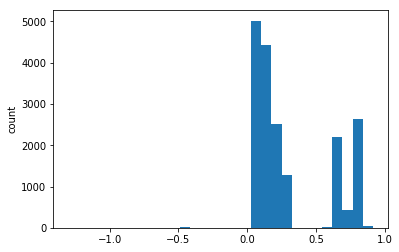

In [101]:
plt.hist(df['value'][~np.isnan(df['value'])], bins=30)
plt.ylabel('count')
plt.show()

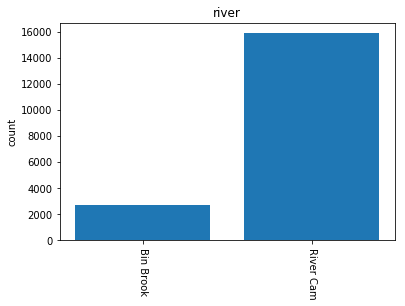

In [111]:
vs, ns = np.unique(df['river'], return_counts=True)
xs = np.arange(len(vs))
plt.bar(xs, ns, align='center')
plt.xticks(xs, vs, rotation=-90)
plt.ylabel('count')
plt.title('river')
plt.show()

In [120]:
vs, ns = np.unique(np.vstack([df['lat'],df['lng']]).T, return_counts=True, axis=0)
vs

array([[ 51.023159,  -2.565568],
       [ 51.699985,  -2.360238],
       [ 51.730432,  -2.362218],
       [ 52.134462,   0.141784],
       [ 52.197227,   0.087527],
       [ 52.212835,   0.120872],
       [ 52.236542,   0.176925]])

In [123]:
ns

array([2657, 2665, 2645, 2617, 2665, 2653, 2653])

In [130]:
!pip3 install gmplot -q
import gmplot
import tempfile, webbrowser

In [129]:
gmap = gmplot.GoogleMapPlotter(52.212, 0.1208, 16)
for x,y,r in zip(vs[:,0],vs[:,1],ns):
    gmap.circle(x,y,r/10)

with tempfile.NamedTemporaryFile(delete=False, suffix='.html') as f:
    gmap.draw(f.name)
    webbrowser.open('file://' + f.name)

### Cuts

In [183]:
x = (df['value'] - df['low']) / (df['high'] - df['low'])
summarize(x)

values
  min:   -2.31010452962
  25%:   0.0279531109107
  med:   0.27652733119
  mean:  0.309810467293
  75%:   0.43729903537
  max:   1.65196078431
  (nan): 2


In [187]:
y = np.digitize(x, bins=np.nanpercentile(x, [100/3, 200/3]))


values
  min:   0.0
  25%:   0.0
  med:   1.0
  mean:  1.00393424953
  75%:   2.0
  max:   2.0


## Numerical aggregation. Cross tabs. Facet plots.

For each measure: number of readings, mean and std.dev

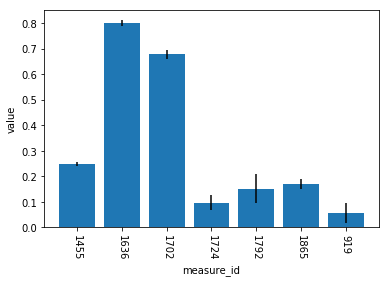

In [145]:
res = {'measure_id':[], 'n':[], 'mean':[], 'sd':[]}
for m in np.unique(df['measure_id']):
    i = df['measure_id'] == m
    # Exercise: a better way to get indexes: https://stackoverflow.com/a/23271510
    res['measure_id'].append(m)
    res['n'].append(np.count_nonzero(i))
    res['mean'].append(np.nanmean(df['value'][i]))
    res['sd'].append(np.nanstd(df['value'][i]))

xs = np.arange(len(res['measure_id']))
plt.bar(xs, res['mean'], align='center')
plt.errorbar(xs, res['mean'], yerr=res['sd'], linestyle='None', ecolor='k')
plt.xticks(xs, res['measure_id'], rotation=-90)
plt.ylabel('value')
plt.xlabel('measure_id')
plt.show()

### Cross tabs

In [179]:
def crosstab(df, cols, countlabel='n'):
    x = np.rec.fromarrays([df[col] for col in cols], names=cols)
    vs, ns = np.unique(x, return_counts=True)
    x = OrderedDict((k,vs[k]) for k in vs.dtype.names)
    x[countlabel] = ns
    return x

In [169]:
pandas.DataFrame(crosstab(df, ['label','measure_id']))

,label,measure_id,n
0,Bin Brook,1792,2665
1,Cam,1636,2665
2,Cambridge,1865,2645
3,Cambridge Baits Bite,1455,2653
4,Cambridge Jesus Lock,1702,2653
5,Dernford,1724,2617
6,Weston Bampfylde,919,2657


In [180]:
# Question. Is there one label/measure_id per town:river?
x = crosstab(df, ['town','river','measure_id'])
y = crosstab(x, ['town','river'], countlabel='num_measures')
pandas.DataFrame(y)

,town,river,num_measures
0,Cam,River Cam,1
1,Cambridge,Bin Brook,1
2,Cambridge,River Cam,2
3,Great Shelford,River Cam,1
4,Milton,River Cam,1
5,Weston Bampfylde,River Cam,1
